In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

## SOEE3250/SOEE5675M/5116					

Inverse Theory

# Practical 7: Maximum likelihood
In this practical you will learn how to find a maximum likelihood estimate (MLE). As we saw in the lecture, if the problem is linear and the errors are Gaussian, then the MLE is the BLUE. 

Although the BLUE is the best (i.e. lowest variance) **linear** estimator, it might be that there is a better **non linear** estimator. 
The aim here is to find a MLE for a simple problem that is nonlinear, and actually performs better than the BLUE. 

To achieve this, you will simulate measurements for a given set of model parameters and then use both the BLUE and the MLE to invert the problem 100 times. Simulation of data has the advantage that you know what the true values are for the model parameters, which enables you to assess how successful each estimator is.

## Inverse problem description

Using a gravimeter, 15 independent relative gravity measurements are made. The data are assumed drawn from a Cauchy distribution, the PDF of which is given by

$$ f(x \vert \mu, \gamma) = \frac{1}{\pi \gamma\left[1 + \left(\frac{x-\mu}{\gamma}\right)^2\right] }$$
where $\mu$ is the mean and $\gamma$ is related to the width of the PDF. Throughout the practical, the value of gamma can be taken to be 0.03 mGal.

[N.B. The Cauchy distribution is used here by way of example, and does not represent the typical error distribution for a real gravimeter.]


Q1) Simulate 10,000 random values drawn from a Cauchy distribution with $\mu=0$ and $\gamma=0.03$ mGal. Seed the random number generator with 10.
 
Plot a histogram of the distribution using 1000 bins. 

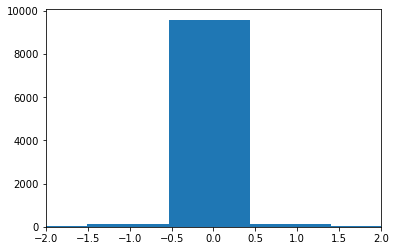

In [2]:
from scipy.stats import cauchy
# draw from the Cauchy distribution 10,000 times, with seed 10.
d = cauchy.rvs(loc=0, scale=0.03, size=10000, random_state=10)
plt.figure()
plt.hist(d,bins=1000)
plt.xlim([-2,2]);

Q2) Here is an equivalent plot for the normal distribution. How is it different from the Cauchy distribution?

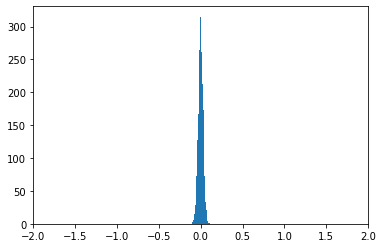

In [4]:
from scipy.stats import multivariate_normal
# draw from the Cauchy distribution 10,000 times, with seed 10.
d_normal = multivariate_normal.rvs(mean=0, cov=0.03**2, size=10000, random_state=10)
plt.figure()
plt.hist(d_normal,bins=100)
plt.xlim([-2,2]);

Q3) Assuming that the true gravity value is $\mu=30$ mGal, simulate 15 measurements drawn from a Cauchy distribution with $\gamma=0.03$ mGal. 
Seed the random number generator as above. 
Plot the 15 values against index as black points and a red line representing the true value.

What does "np.ones(15)*30" do?

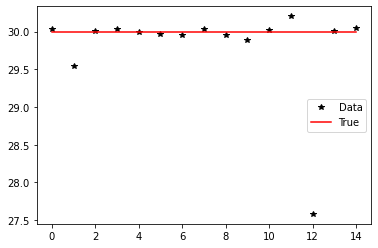

In [5]:
plt.figure()
d = cauchy.rvs(loc=30, scale=0.03, size=15, random_state=10)
plt.plot(d,'*',color='black' ,label='Data')
plt.plot(np.ones(15)*30,'-',color='red', label='True')
plt.legend(loc='center right');

Q4) Use the BLUE (i.e. the mean) to estimate the gravity value from the simulated measurements and plot the estimate as a red horizontal line along with your other lines in the plot above (copy and paste the Python commands you used before).

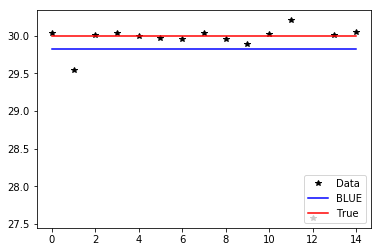

In [8]:
BLUE = np.mean(d)
plt.plot(d,'*',color='black' ,label='Data')
plt.plot(np.ones(15)*BLUE,'-',color='blue', label='BLUE')
plt.plot(np.ones(15)*30,'-',color='red', label='True')
plt.legend(loc='lower right');


Q5) On paper:
- Write down the PDF for a single measurement. Then write down the joint PDF for all 15 measurements (the product of the PDFs for the individual measurements)

- Take the natural logarithm of the joint PDF (write your answer)

- Differentiate the logarithm of the joint PDF with respect to the maximising parameter (the model mean). 

- What condition must be met for the differential to be zero (i.e. how would you find the MLE)? 

You should find that the condition is that
$$ \sum_{i=1}^{15} \frac{ (x_i - \mu) }{\gamma^2 + (x_i - \mu)^2} = 0$$

Steps:
    $$f(x \vert \mu,\gamma) = \frac{1}{(\pi \gamma)^{15}} \Pi_{i=1}^{i=15} \frac{1}{\left[1 + \left(\frac{x_i-\mu}{\gamma}\right)^2\right] } $$

 $$ \ln f(x \vert \mu,\gamma) = -15 \ln (\pi \gamma) -  \sum_{i=1}^{i=15} \ln \left[1 + \left(\frac{x_i-\mu}{\gamma}\right)^2\right]  $$

$$ \frac{\partial f}{\partial \mu} =   -  \sum_{i=1}^{i=15} \frac{1}{ \left[1 + \left(\frac{x_i-\mu}{\gamma}\right)^2\right]} \left(\frac{x_i-\mu}{\gamma}\right). \frac{2}{\gamma}  $$

$$ \frac{\partial f}{\partial \mu} =   -2  \sum_{i=1}^{i=15} \frac{(x_i-\mu)}{ \left[\gamma^2 + (x_i-\mu)^2 \right]}  $$

Q6) Using the same 15 simulated measurements, find the approximate gravity value (to the nearest 0.001 mGal) that gets closest to meeting the MLE condition (use a systematic search of reasonable values of μ to find where the derivative is approximately zero). 

The easiest way of evaluating the condition needed is to create a new vector $v$ with entries:
$$v_i = \frac{ (x_i - \mu) }{\gamma^2 + (x_i - \mu)^2}$$
and then use the np.sum() command to add up its elements.

For each choice of mu, calculate np.sum(v) and store its absolute value in a vector (called r, say). Use np.argmin to find the index of its minimum value, and then find the corresponding value of mu.

Plot the estimate as a green line along with your other lines (as before). Is it closer to the true value than the BLUE?

In [87]:
N = 400
mu_trial = 30 + np.linspace(-0.02,0.02,N)
r=np.zeros(N)
for i in range(N):
    r[i]= 
index = np.argmin(r)
mu_ML = mu_trial[index]


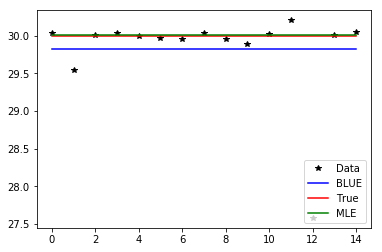

In [10]:
N = 400
gamma = 0.03
mu_trial = 30 + np.linspace(-0.02,0.02,N)
r=np.zeros(N)
for i in range(N):
    v = (d-mu_trial[i])/(gamma**2+(d-mu_trial[i])**2)
    r[i]= np.abs( np.sum(v) )
index = np.argmin(r)
mu_ML = mu_trial[index]

plt.figure()
plt.plot(d,'*',color='black' ,label='Data')
plt.plot(np.ones(15)*BLUE,'-',color='blue', label='BLUE')
plt.plot(np.ones(15)*30,'-',color='red', label='True')
plt.plot(np.ones(15)*mu_ML,'-',color='green', label='MLE');
plt.legend(loc='lower right');

Q7) Now repeat this 1000 times: each time, simulate 15 new measurements and estimate the gravity value using both the BLUE and MLE. 
Plot a histogram of the estimates for both the BLUE and MLE.

Are both estimators unbiased (give reasoning)? Which estimator has lower variance? 

Standard deviation from BLUE 2.471982
Standard deviation from MLE 0.010052


<Figure size 432x288 with 0 Axes>

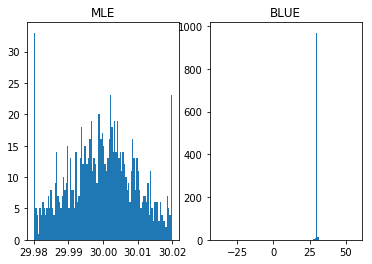

In [161]:
Number_runs = 1000
mu_ML = np.zeros(Number_runs)
mu_BLUE = np.zeros(Number_runs)
for j in range(Number_runs):
    d = cauchy.rvs(loc=30, scale=0.03, size=15)
    for i in range(N):
        r[i]= np.abs( np.sum( (d-mu_trial[i])/(gamma**2+(d-mu_trial[i])**2)) )
    index = np.argmin(r)
    mu_ML[j] = mu_trial[index]
    mu_BLUE[j] = np.mean(d)
plt.figure()
fig, axs = plt.subplots(1,2)
axs[0].hist(mu_ML, bins=100)
axs[1].hist(mu_BLUE, bins=100)
axs[0].set_title('MLE')
axs[1].set_title('BLUE')
print('Standard deviation from BLUE {0:f}'.format(np.std(mu_BLUE) ))
print('Standard deviation from MLE {0:f}'.format(np.std(mu_ML) ));